In [180]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

df = pd.read_csv('../data/raw/gsearch_jobs.csv')

In [2]:
df.head()

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,0,Data Analyst,Meta,Anywhere,via LinkedIn,In the intersection of compliance and analytic...,"['15 hours ago', '101K–143K a year', 'Work fro...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,101K–143K,a year,122000.0,101000.0,143000.0,NaN,122000.0,122000.0,"['tableau', 'r', 'python', 'sql']"
1,1,1,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,2,2,Aeronautical Data Analyst,"Garmin International, Inc.","Olathe, KS",via Indeed,Overview:\n\nWe are seeking a full-time...\nAe...,"['18 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJBZXJvbmF1dGljYWwgRGF0YSBBbm...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['sql']
3,3,3,Data Analyst - Consumer Goods - Contract to Hire,Upwork,Anywhere,via Upwork,Enthusiastic Data Analyst for processing sales...,"['12 hours ago', '15–25 an hour', 'Work from h...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBDb25zdW...,NaN,...,NaN,15–25,an hour,20.0,15.0,25.0,20.0,NaN,41600.0,"['powerpoint', 'excel', 'power_bi']"
4,4,4,Data Analyst | Workforce Management,Krispy Kreme,United States,via LinkedIn,Overview of Position\n\nThis position will be ...,"['7 hours ago', '90K–110K a year', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgfCBXb3JrZm...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,90K–110K,a year,100000.0,90000.0,110000.0,NaN,100000.0,100000.0,"['powerpoint', 'excel', 'outlook', 'word']"


In [3]:
df.shape

(61953, 27)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61953 entries, 0 to 61952
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           61953 non-null  int64  
 1   index                61953 non-null  int64  
 2   title                61953 non-null  object 
 3   company_name         61953 non-null  object 
 4   location             61916 non-null  object 
 5   via                  61944 non-null  object 
 6   description          61953 non-null  object 
 7   extensions           61953 non-null  object 
 8   job_id               61953 non-null  object 
 9   thumbnail            38194 non-null  object 
 10  posted_at            61763 non-null  object 
 11  schedule_type        61707 non-null  object 
 12  work_from_home       27980 non-null  object 
 13  salary               10088 non-null  object 
 14  search_term          61953 non-null  object 
 15  date_time            61953 non-null 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,61953.0,30976.000000,17884.434951,0.00,15488.000,30976.0,46464.0,61952.0
index,61953.0,1139.077333,690.256113,0.00,553.000,1111.0,1685.0,3228.0
commute_time,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_avg,10088.0,42100.231239,55893.993519,7.25,31.500,60.0,92500.0,550000.0
salary_min,9512.0,34846.281874,45843.034891,8.00,19.520,50.0,77000.0,450000.0
salary_max,9512.0,50487.856787,67366.522273,10.00,45.000,75.0,110000.0,850000.0
salary_hourly,5900.0,40.539588,22.214540,7.25,23.265,33.5,55.0,300.0
salary_yearly,4069.0,104115.406718,36024.388492,29289.84,80000.180,96500.0,120000.0,550000.0
salary_standardized,10088.0,92289.425683,43277.933820,15080.00,62400.000,88400.0,117500.0,624000.0


In [6]:
df.columns

Index(['Unnamed: 0', 'index', 'title', 'company_name', 'location', 'via',
       'description', 'extensions', 'job_id', 'thumbnail', 'posted_at',
       'schedule_type', 'work_from_home', 'salary', 'search_term', 'date_time',
       'search_location', 'commute_time', 'salary_pay', 'salary_rate',
       'salary_avg', 'salary_min', 'salary_max', 'salary_hourly',
       'salary_yearly', 'salary_standardized', 'description_tokens'],
      dtype='object')

In [7]:
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0].sort_values(ascending=False)

print(null_counts)

commute_time           61953
salary_yearly          57884
salary_hourly          56053
salary_min             52441
salary_max             52441
salary                 51865
salary_pay             51865
salary_rate            51865
salary_avg             51865
salary_standardized    51865
work_from_home         33973
thumbnail              23759
schedule_type            246
posted_at                190
location                  37
via                        9
dtype: int64


# Univariate Analysis

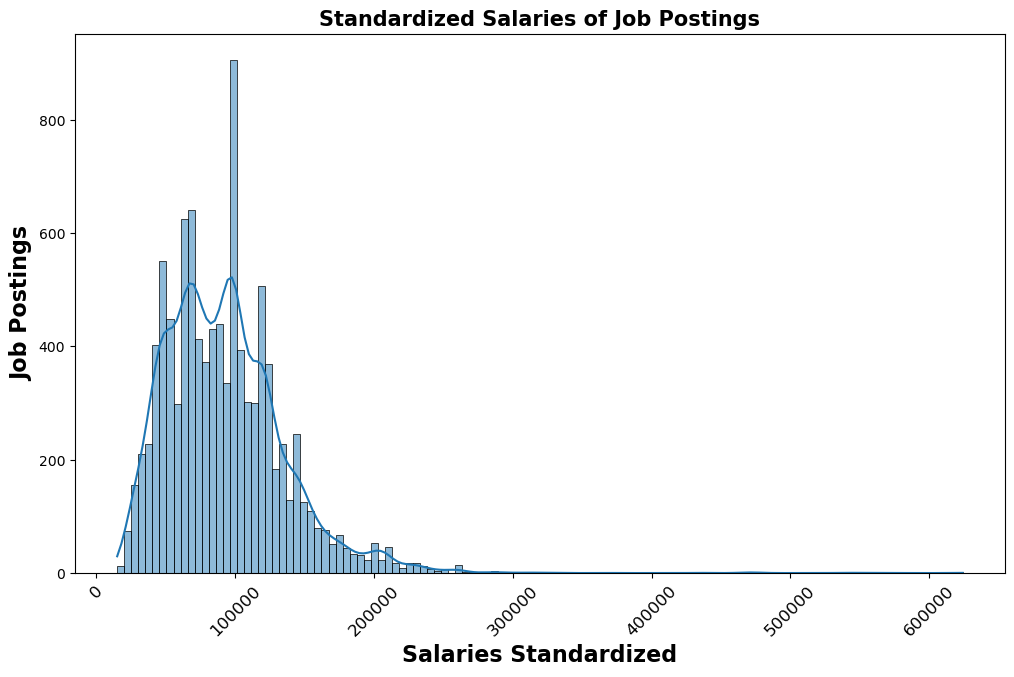

In [34]:
plt.figure(figsize=(12, 7))

sns.histplot(data=df, x='salary_standardized', kde=True)
plt.title('Standardized Salaries of Job Postings', weight='bold', fontsize=15)
plt.xlabel('Salaries Standardized', fontsize=16, weight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.ylabel('Job Postings', weight='bold', fontsize=16)
plt.show()

Around 100k USD is the most commmon salary amount.

In [40]:
df.columns

Index(['Unnamed: 0', 'index', 'title', 'company_name', 'location', 'via',
       'description', 'extensions', 'job_id', 'thumbnail', 'posted_at',
       'schedule_type', 'work_from_home', 'salary', 'search_term', 'date_time',
       'search_location', 'commute_time', 'salary_pay', 'salary_rate',
       'salary_avg', 'salary_min', 'salary_max', 'salary_hourly',
       'salary_yearly', 'salary_standardized', 'description_tokens'],
      dtype='object')

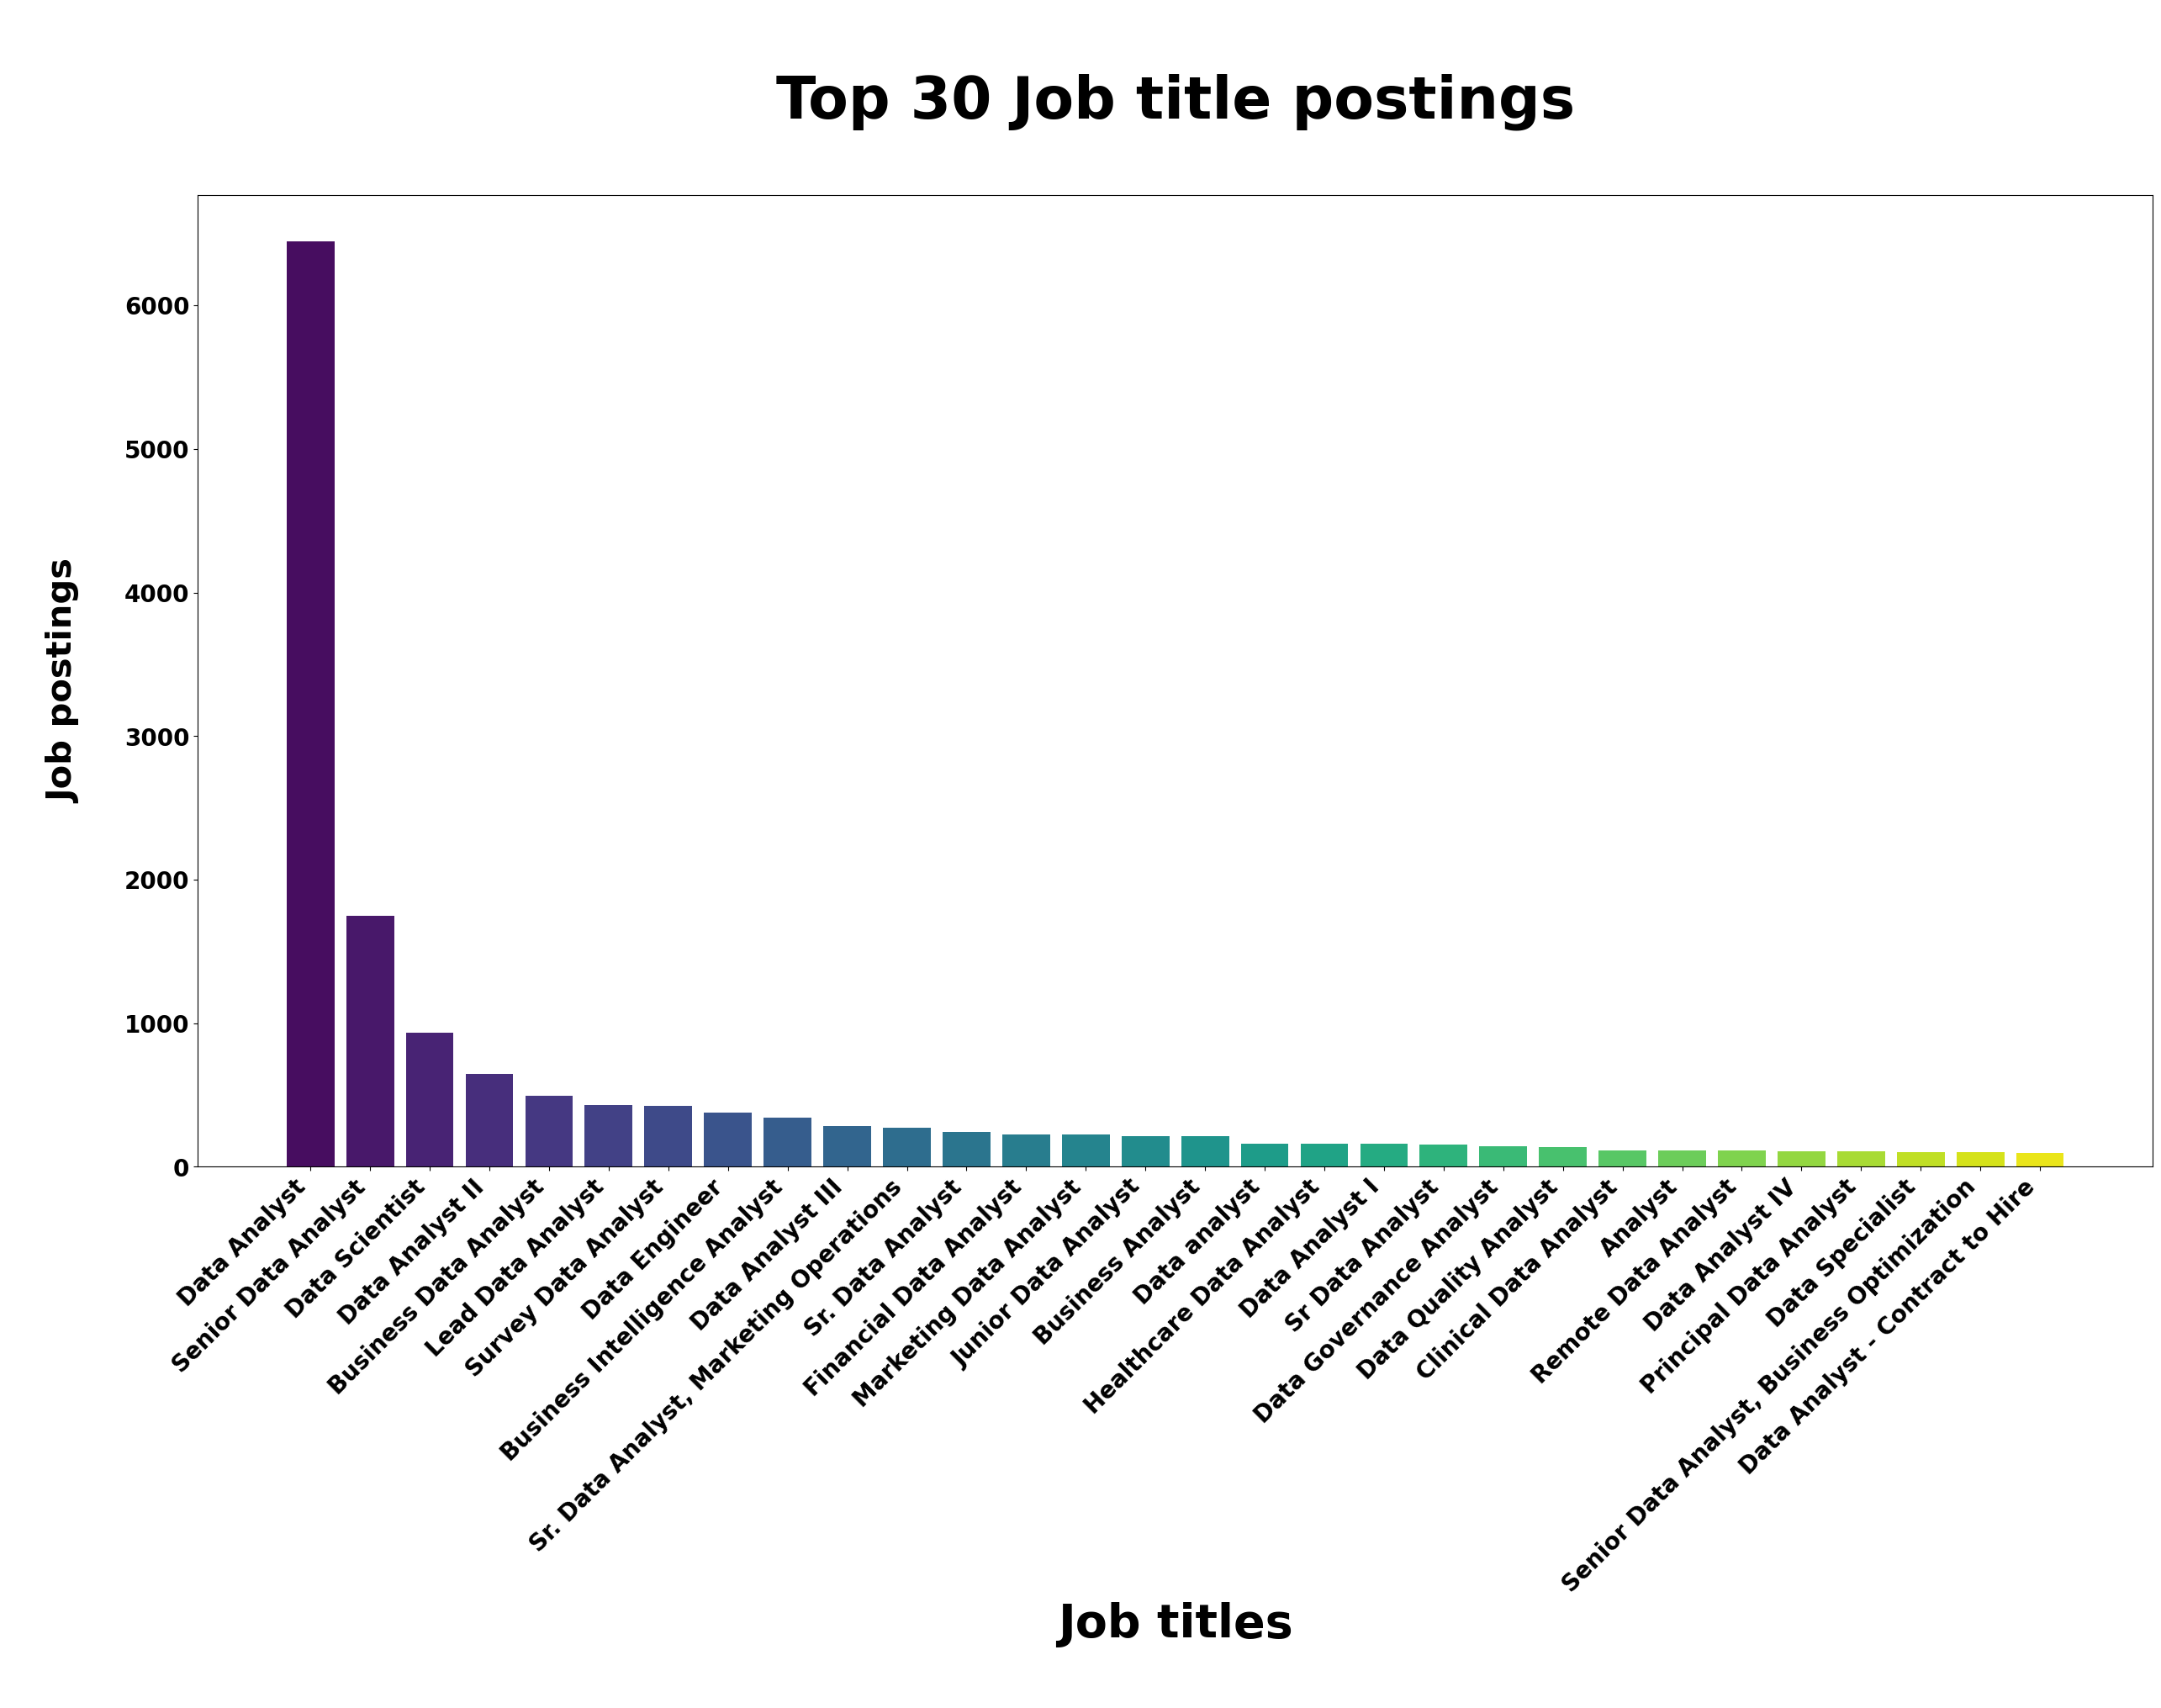

In [119]:
top_30_title = df['title'].value_counts().head(30)
plt.figure(figsize=(30, 15))
colors1 = sns.color_palette('viridis',len(top_30_title))

plt.bar(top_30_title.index, top_30_title.values, color=colors1)
plt.title('\nTop 30 Job title postings\n', weight='bold', fontsize=50)
plt.xlabel('Job titles\n', weight='bold', fontsize=40)
plt.xticks(rotation=45, ha='right', weight='bold', fontsize=20)
plt.ylabel('\nJob postings\n', weight='bold', fontsize=30)
plt.yticks(weight='bold', fontsize=20)
plt.show()

In [179]:
top_30_title

title
Data Analyst                                  6444
Senior Data Analyst                           1748
Data Scientist                                 931
Data Analyst II                                644
Business Data Analyst                          495
Lead Data Analyst                              428
Survey Data Analyst                            422
Data Engineer                                  375
Business Intelligence Analyst                  343
Data Analyst III                               284
Sr. Data Analyst, Marketing Operations         271
Sr. Data Analyst                               240
Financial Data Analyst                         227
Marketing Data Analyst                         223
Junior Data Analyst                            213
Business Analyst                               212
Data analyst                                   163
Healthcare Data Analyst                        162
Data Analyst I                                 159
Sr Data Analyst          

Data analyst dominates the job titles with many variations following such as business data analyst and survey data analyst. For some reason, data analyst appears again, as the top 17.

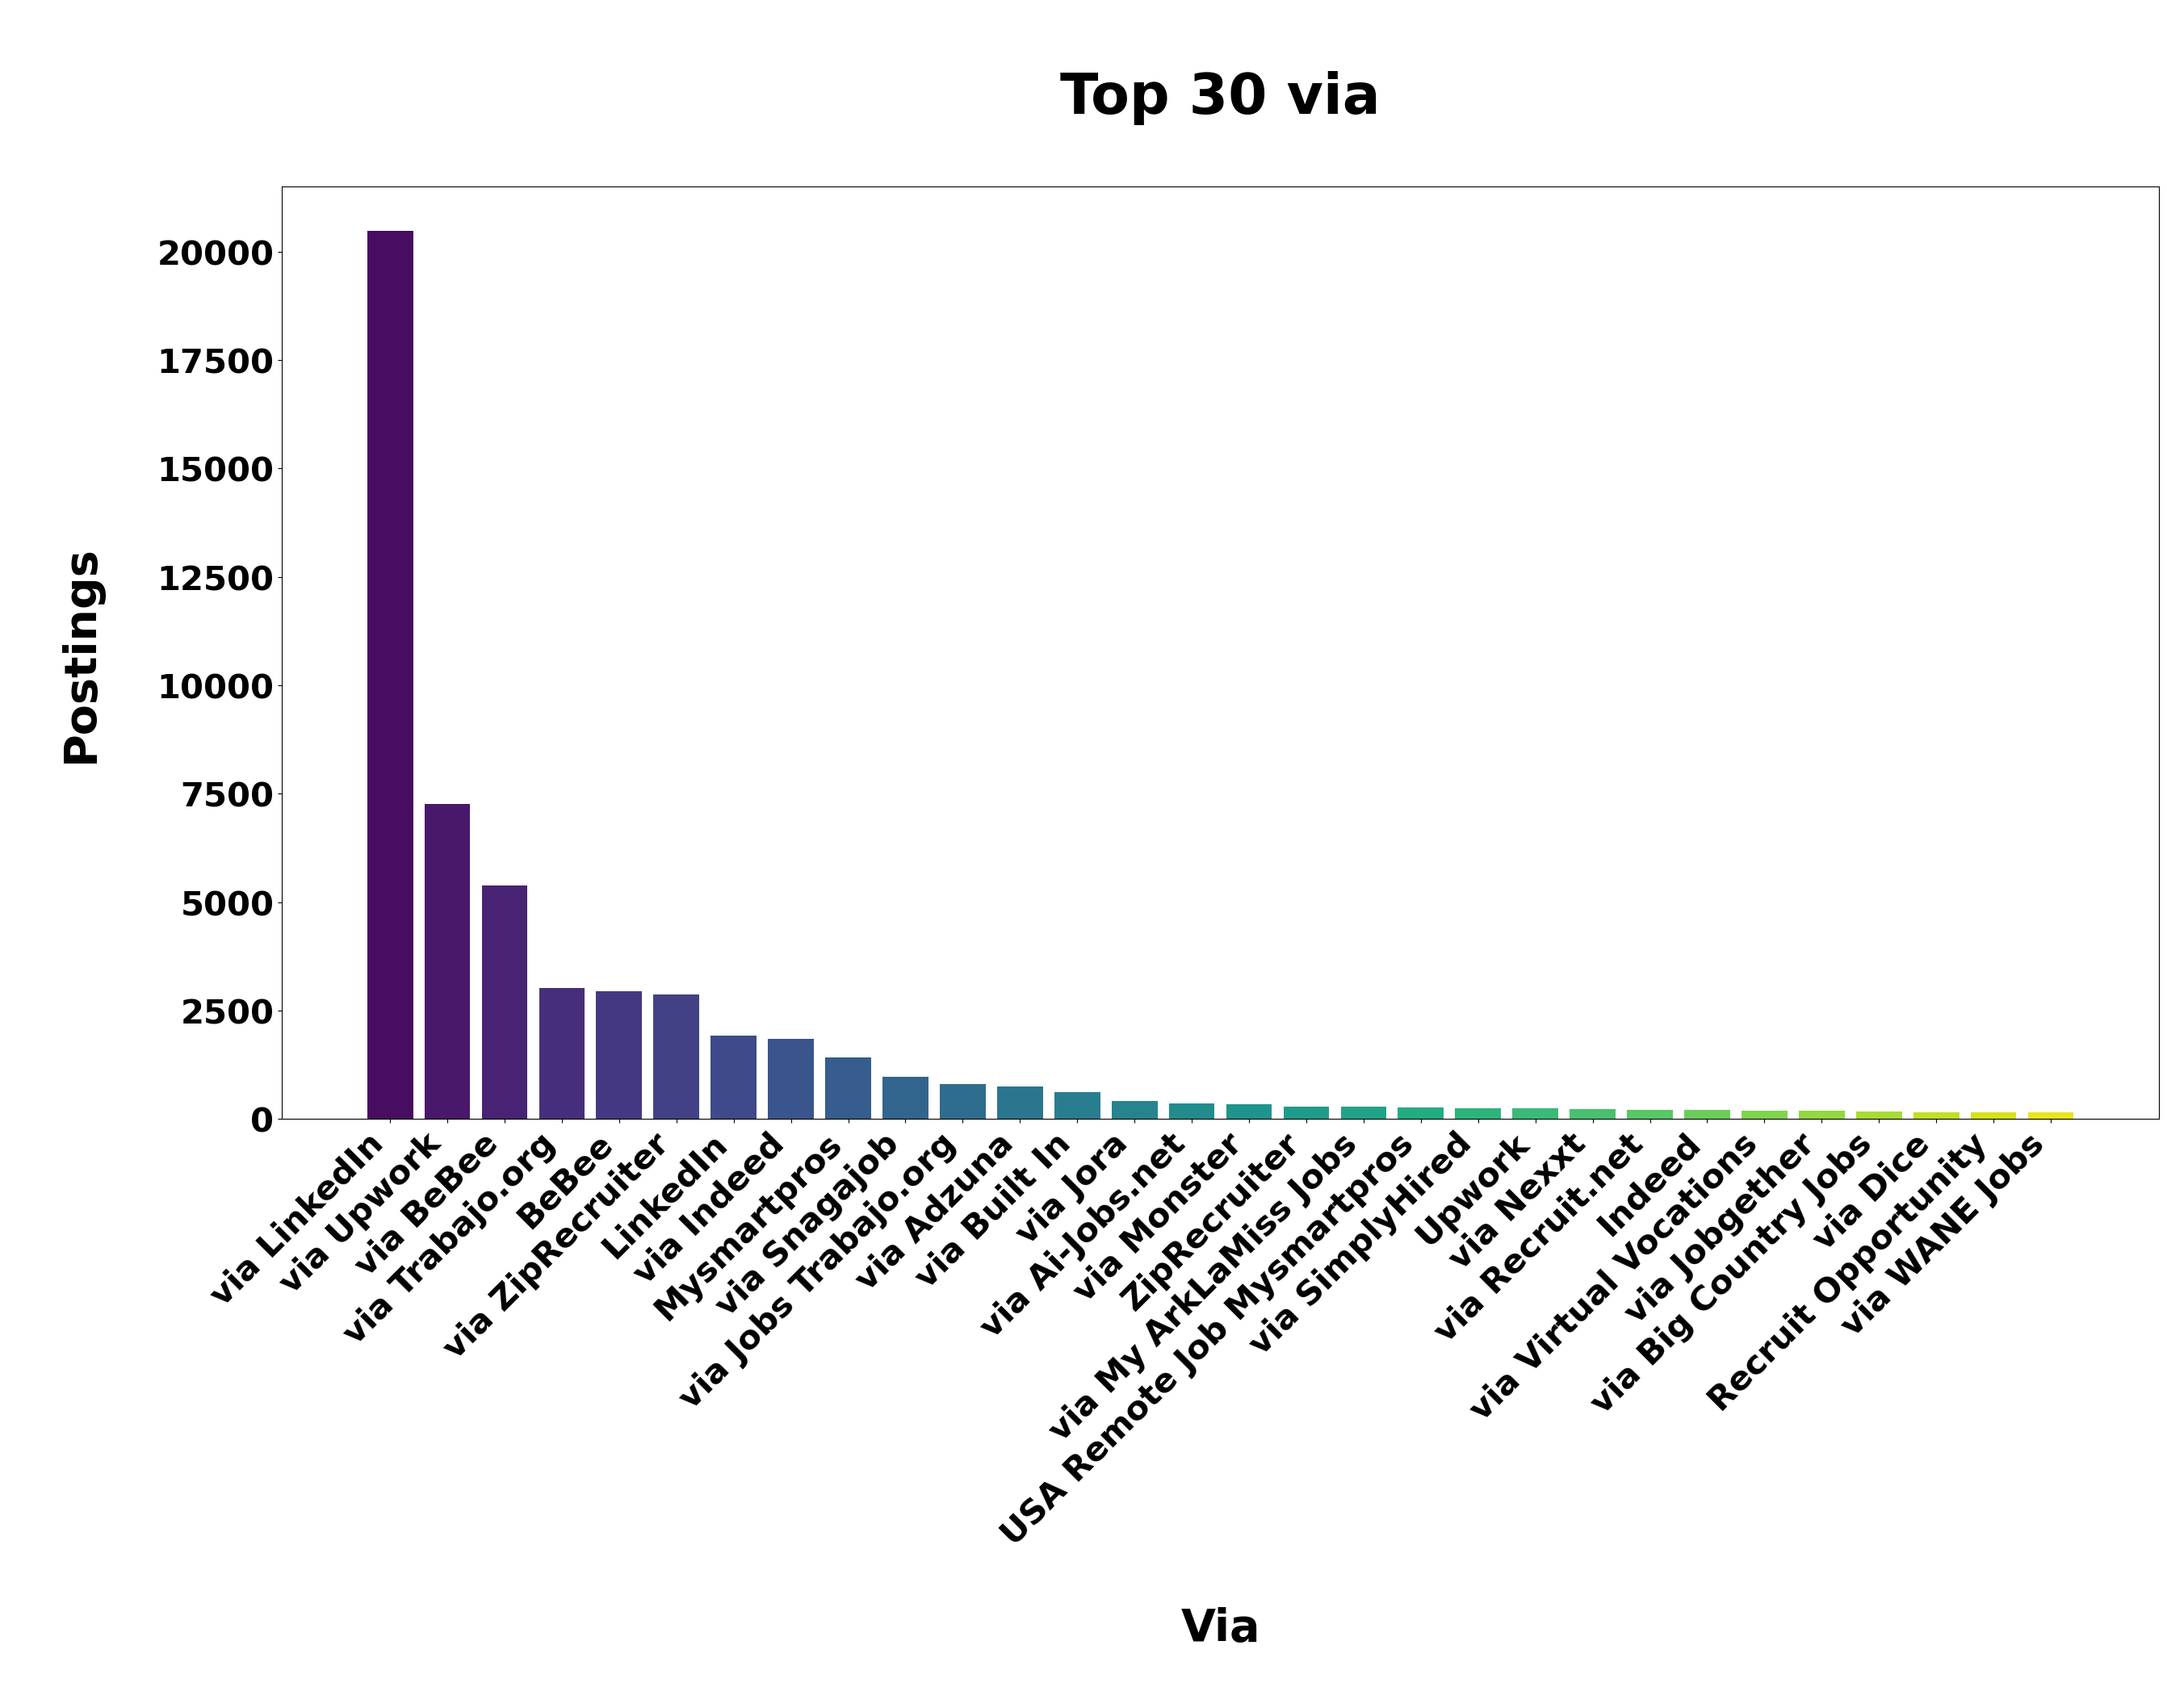

In [130]:
top_30_vias = df['via'].value_counts().head(30)
plt.figure(figsize=(30, 15))
colors1 = sns.color_palette('viridis',len(top_30_vias))

plt.bar(top_30_vias.index, top_30_vias.values, color=colors1)
plt.title('\nTop 30 via\n', weight='bold', fontsize=50)
plt.xlabel('\nVia\n', weight='bold', fontsize=40)
plt.xticks(rotation=45, ha='right', weight='bold', fontsize=30)
plt.ylabel('\nPostings\n', weight='bold', fontsize=40)
plt.yticks(weight='bold', fontsize=30)
plt.show()

Most are by far via Linkedin and many sites seem to appear more than once such as via LinkedIn and then just LinkedIn are treated as if they were separate.

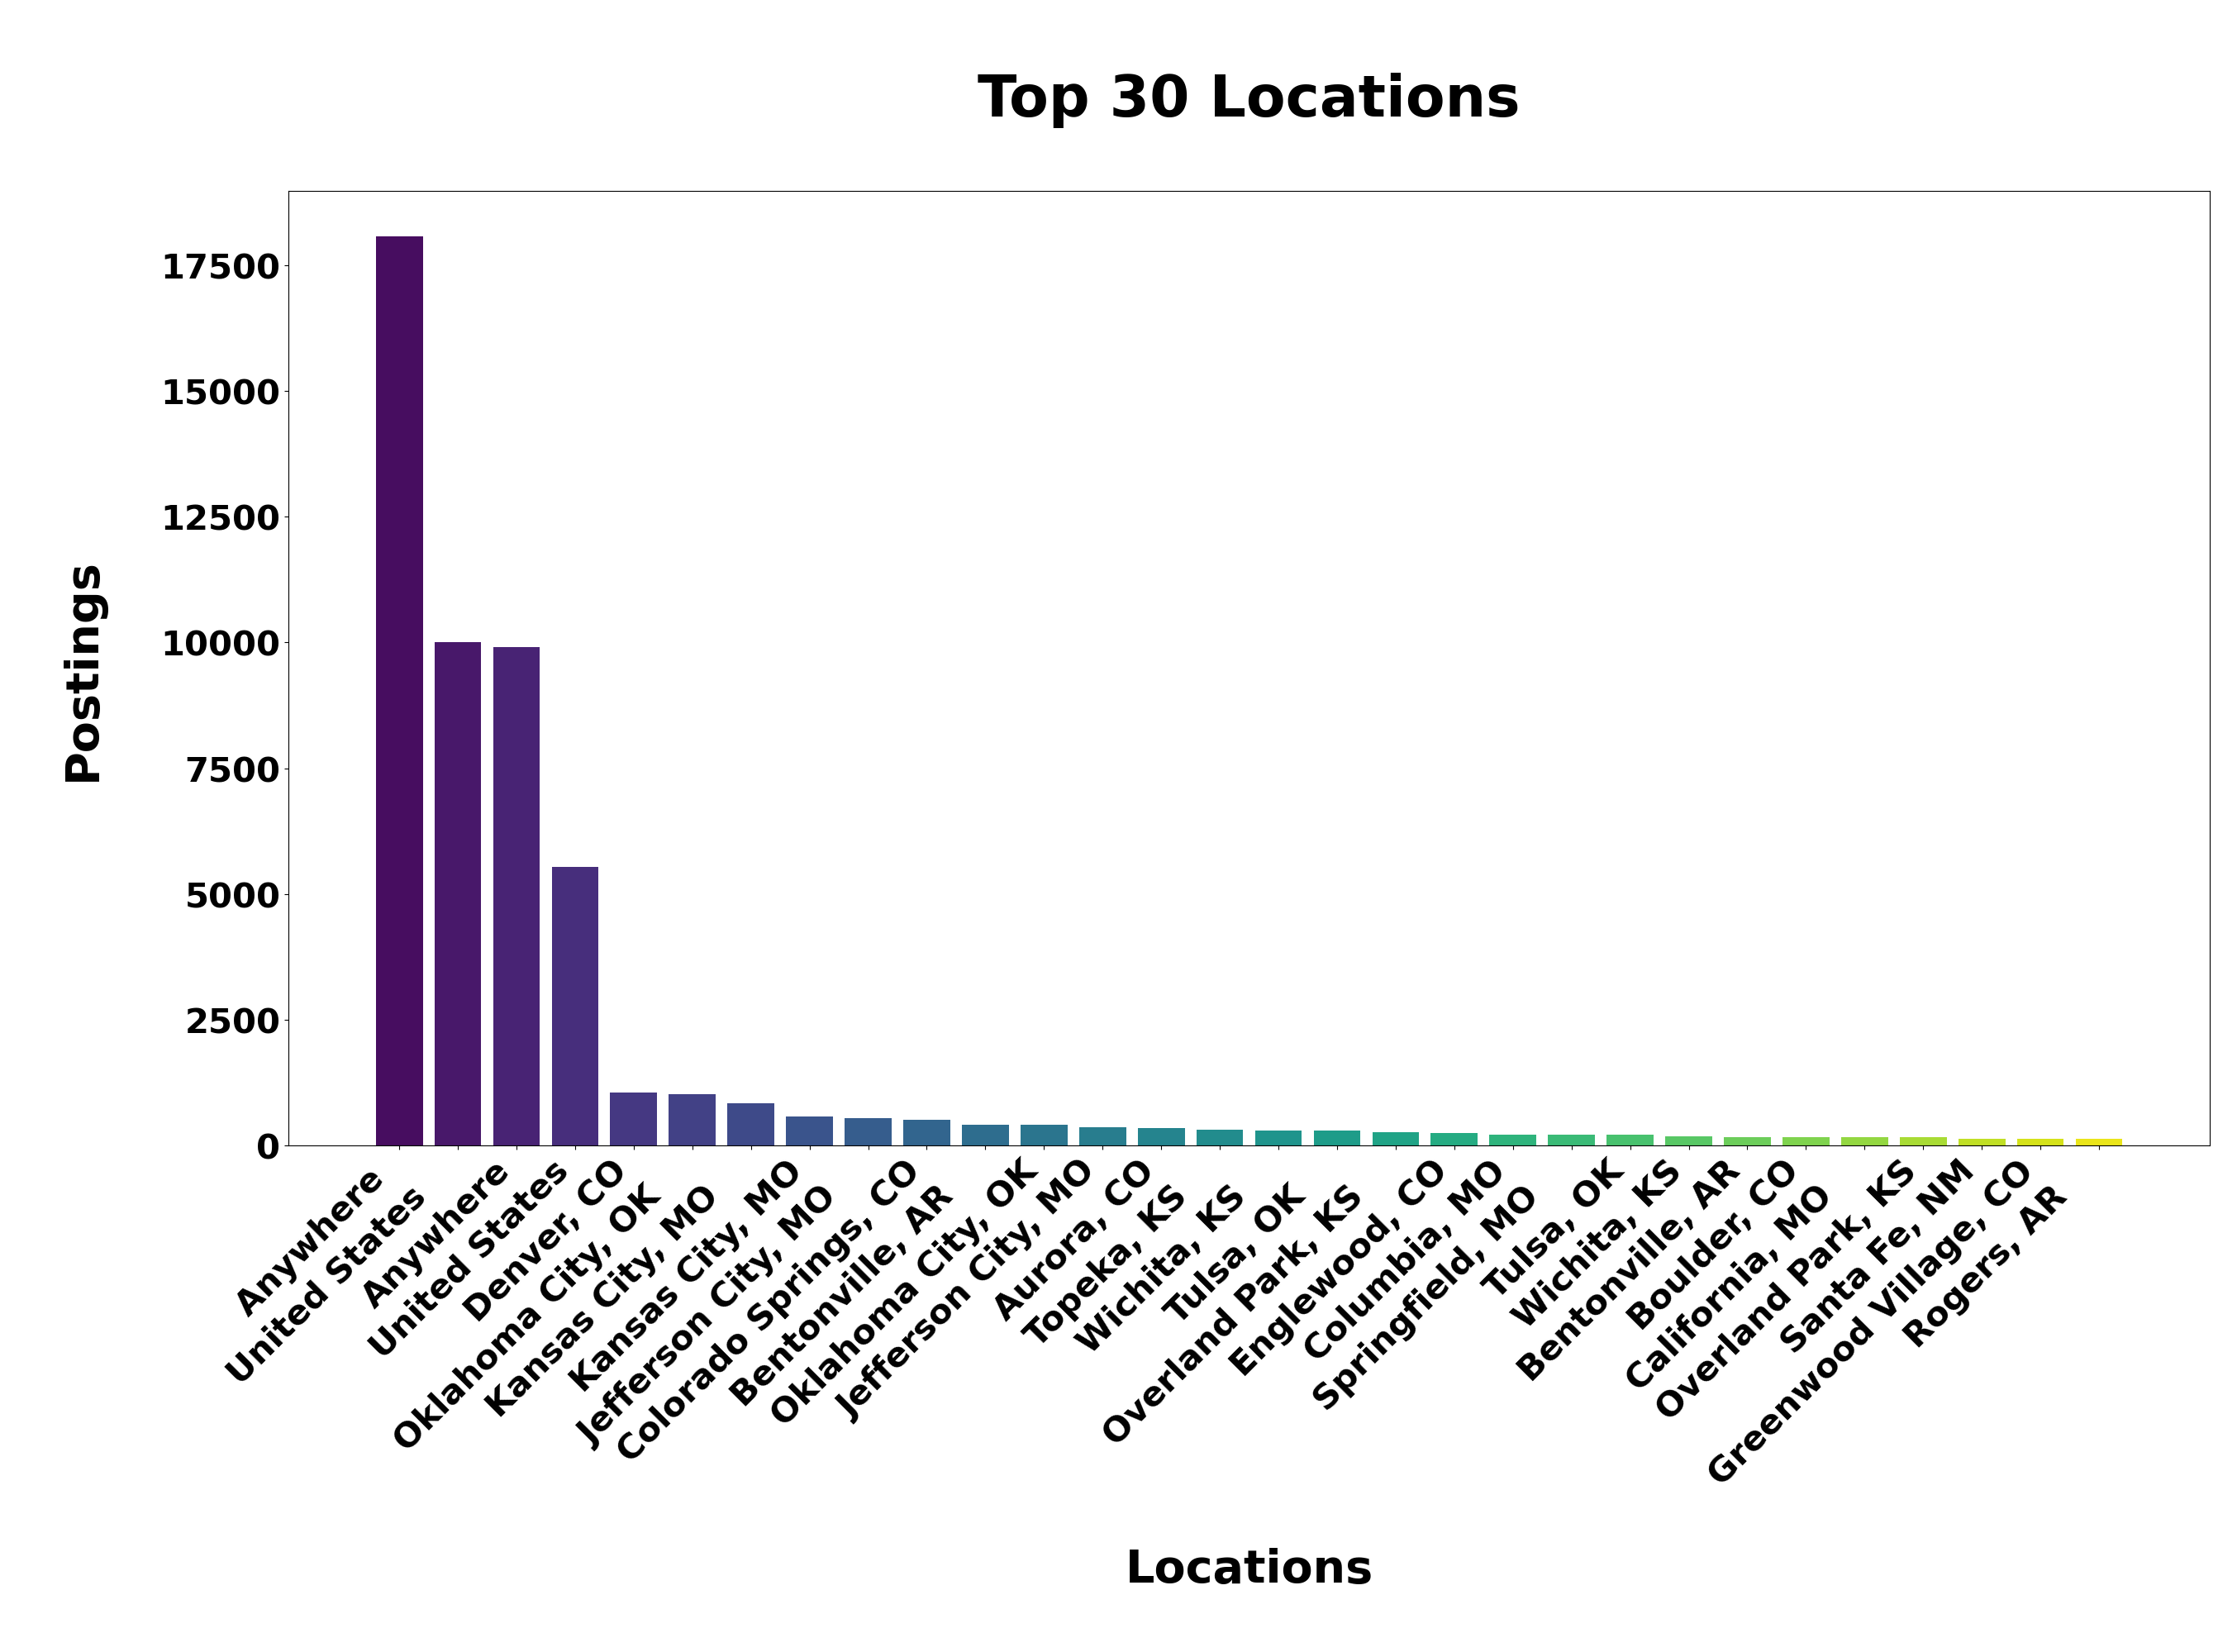

In [134]:
top_30_location = df['location'].value_counts().head(30)
plt.figure(figsize=(30, 15))
colors1 = sns.color_palette('viridis',len(top_30_location))

plt.bar(top_30_location.index, top_30_location.values, color=colors1)
plt.title('\nTop 30 Locations\n', weight='bold', fontsize=50)
plt.xlabel('\nLocations\n', weight='bold', fontsize=40)
plt.xticks(rotation=45, ha='right', weight='bold', fontsize=30)
plt.ylabel('\nPostings\n', weight='bold', fontsize=40)
plt.yticks(weight='bold', fontsize=30)
plt.show()

Anywhere is number one, followed by United States. Oddly anywhere is then number three, and then United States is again following at number four. It also seems very odd that the usual big cities such as NYC and San Francisco are not appearing in the top 30. These location seemed biased towards the midwest.

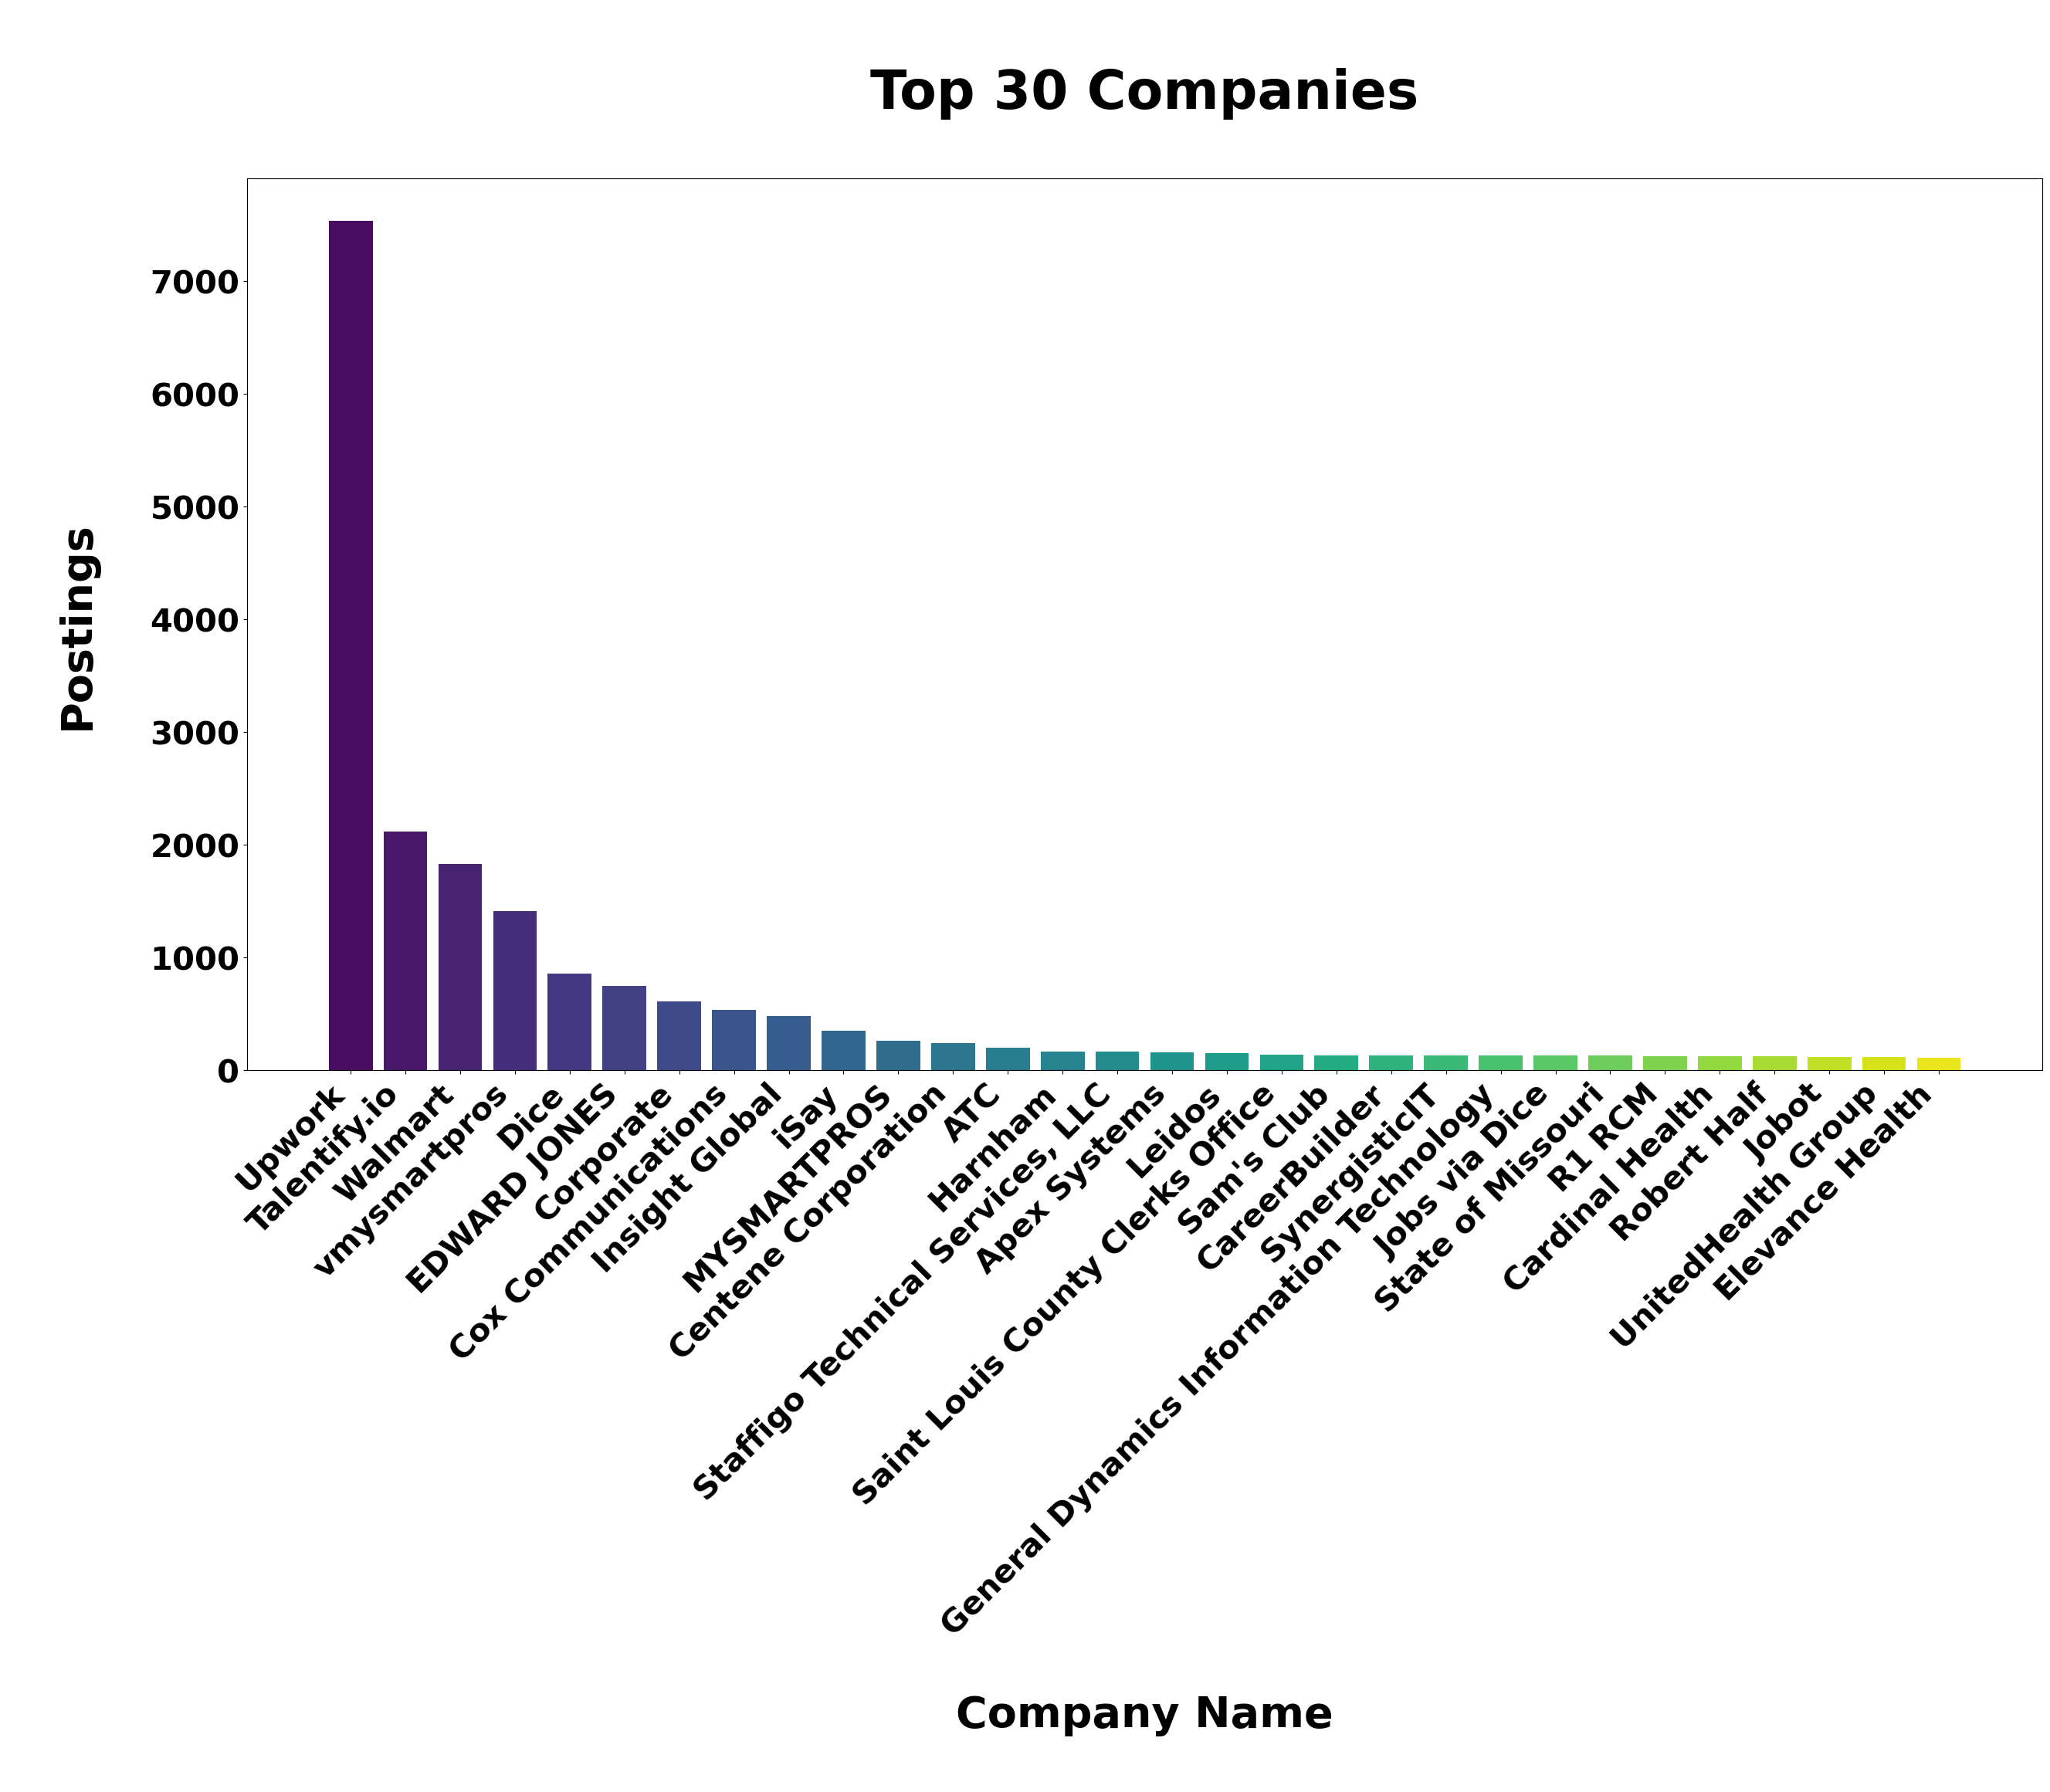

In [137]:
top_30_comp = df['company_name'].value_counts().head(30)
plt.figure(figsize=(30, 15))
colors1 = sns.color_palette('viridis',len(top_30_comp))

plt.bar(top_30_comp.index, top_30_comp.values, color=colors1)
plt.title('\nTop 30 Companies\n', weight='bold', fontsize=50)
plt.xlabel('\nCompany Name\n', weight='bold', fontsize=40)
plt.xticks(rotation=45, ha='right', weight='bold', fontsize=30)
plt.ylabel('\nPostings\n', weight='bold', fontsize=40)
plt.yticks(weight='bold', fontsize=30)
plt.show()

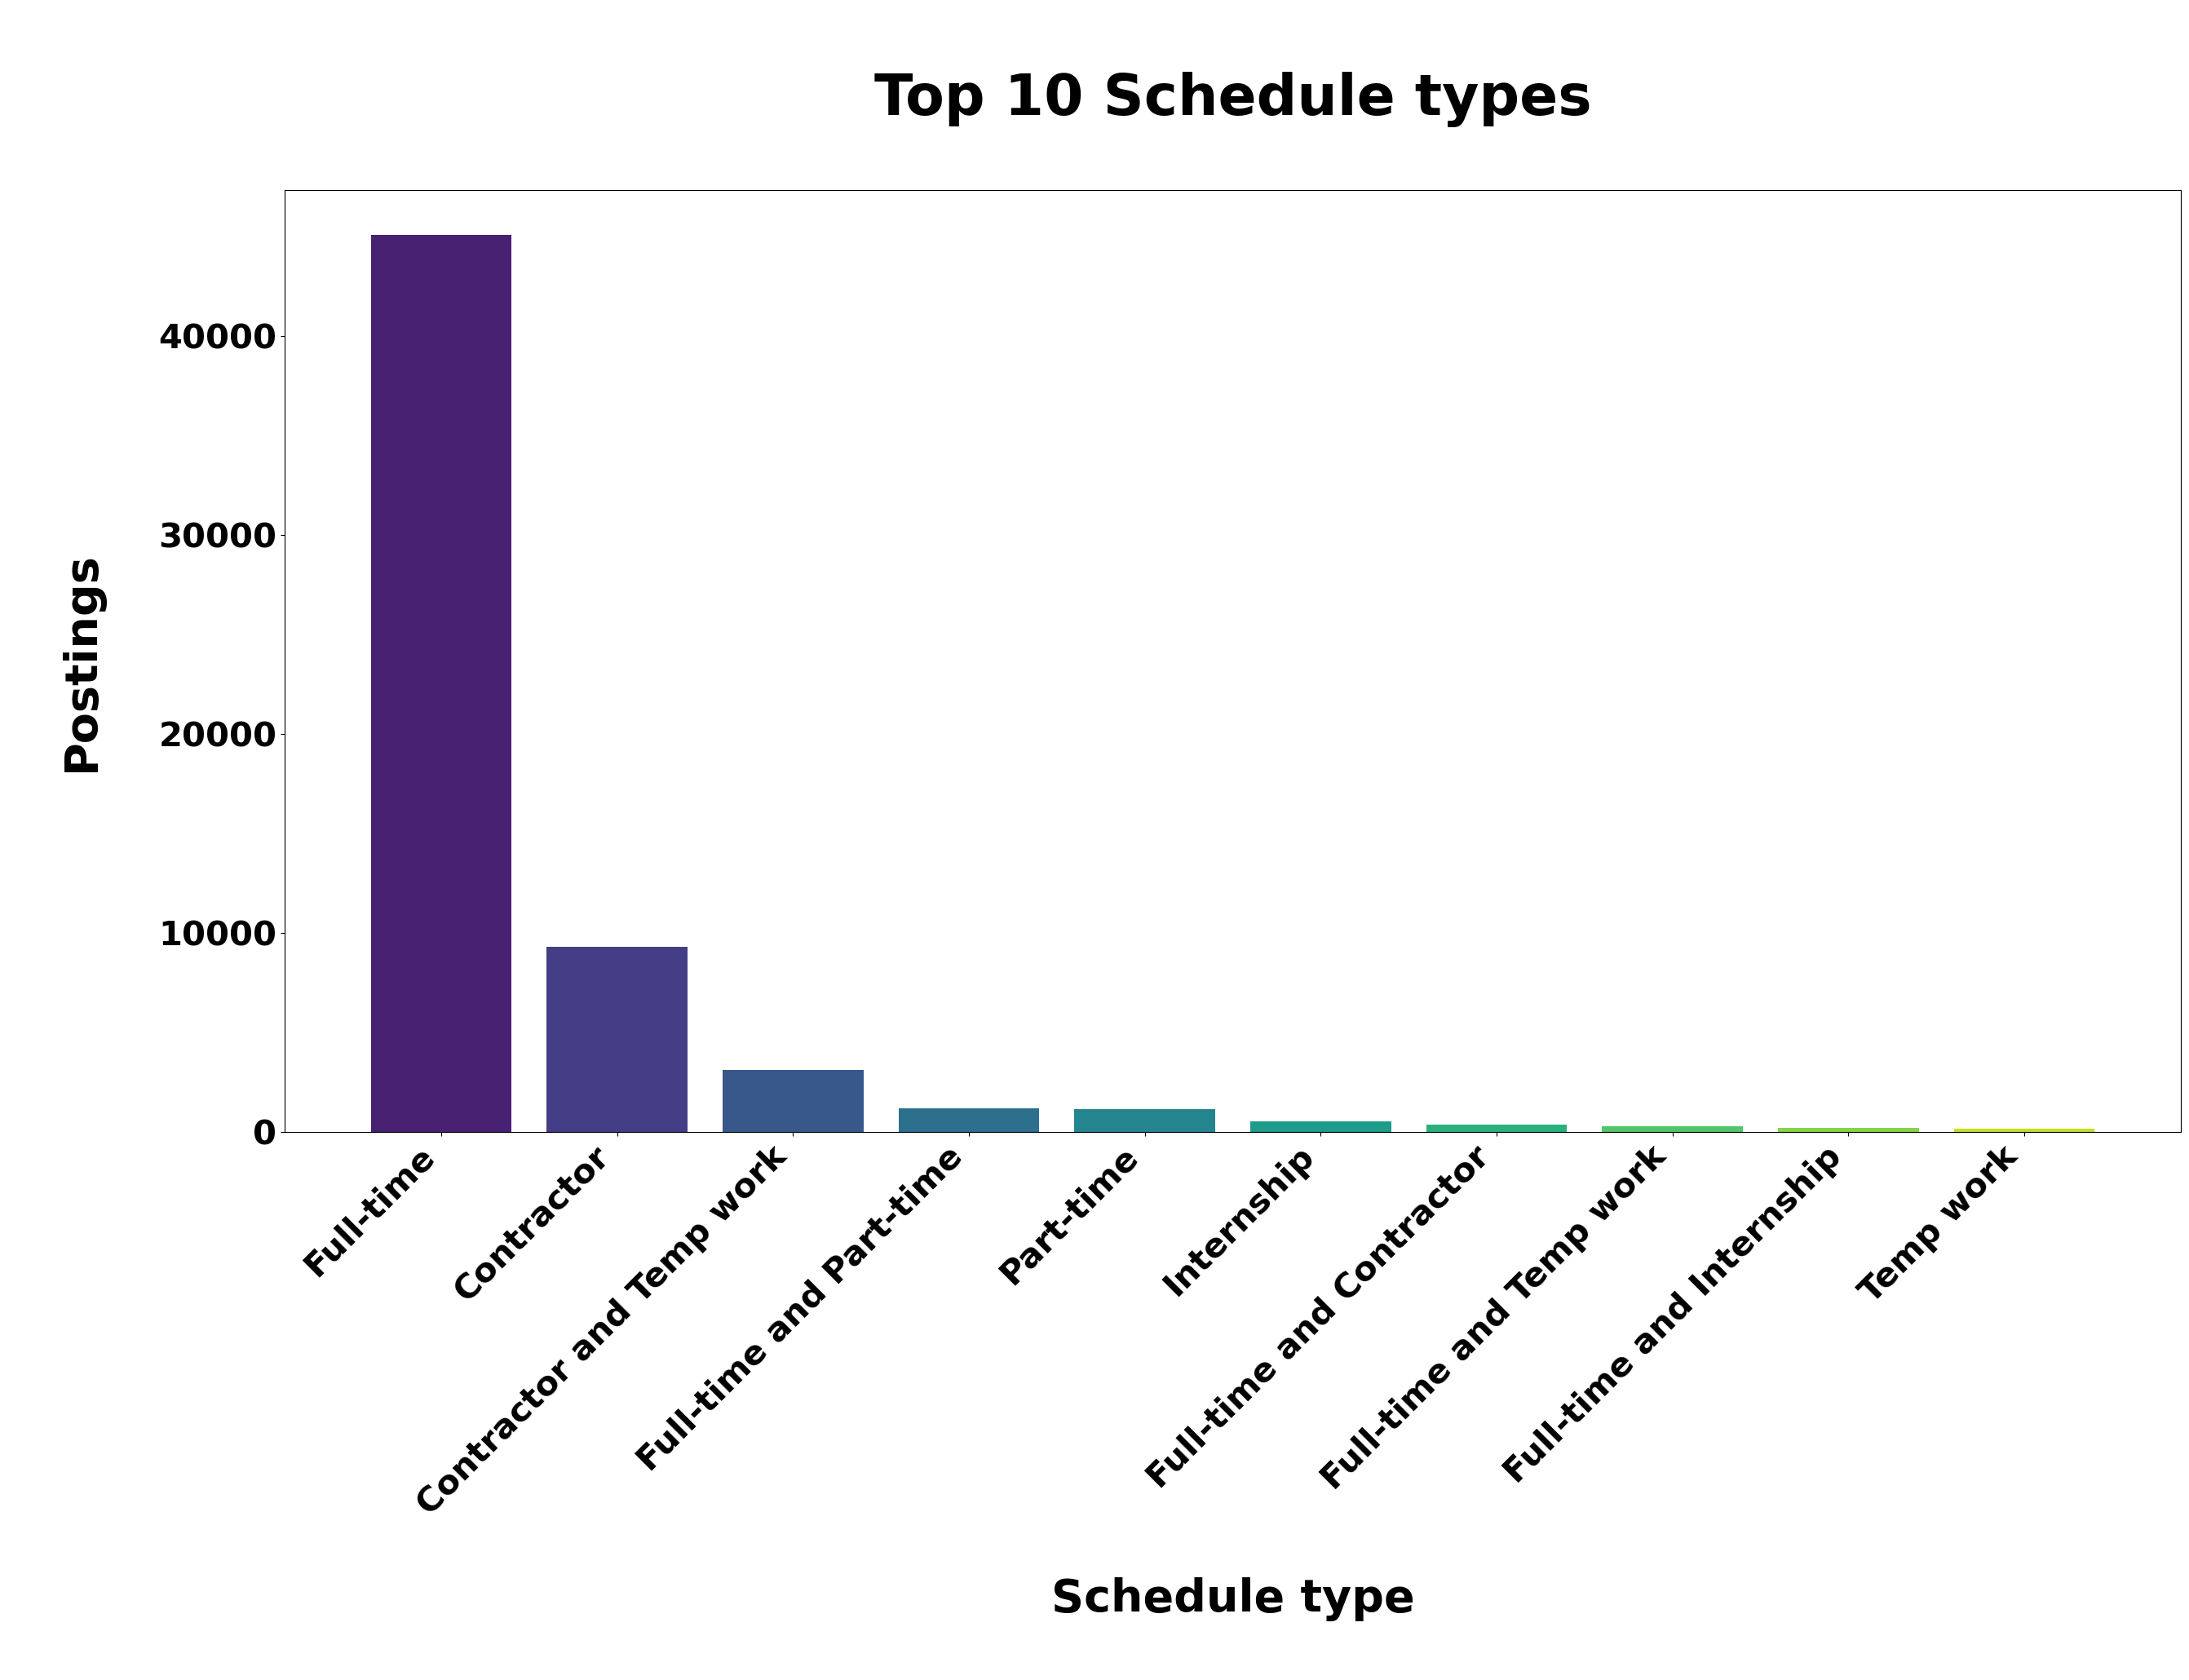

In [142]:
top_10_schedule = df['schedule_type'].value_counts().head(10)
plt.figure(figsize=(30, 15))
colors1 = sns.color_palette('viridis',len(top_10_schedule))

plt.bar(top_10_schedule.index, top_10_schedule.values, color=colors1)
plt.title('\nTop 10 Schedule types\n', weight='bold', fontsize=50)
plt.xlabel('\nSchedule type\n', weight='bold', fontsize=40)
plt.xticks(rotation=45, ha='right', weight='bold', fontsize=30)
plt.ylabel('\nPostings\n', weight='bold', fontsize=40)
plt.yticks(weight='bold', fontsize=30)
plt.show()

Full time dominates and everything after part-time hardly appears in the dataset. There are many other schedule types but they hardly appear in the dataset at all.

<function matplotlib.pyplot.show(close=None, block=None)>

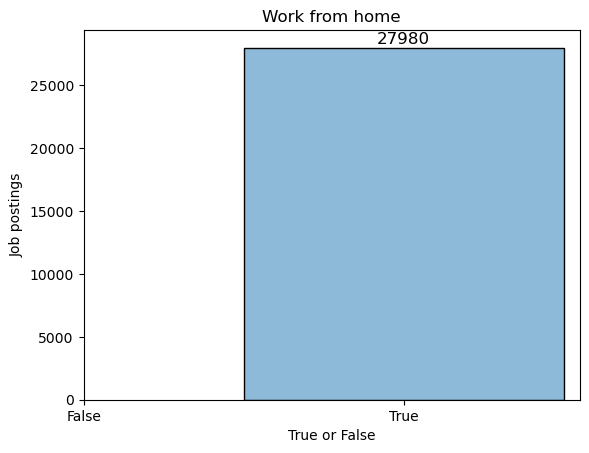

In [170]:
ax = sns.histplot(data=df, x='work_from_home', kde=True)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, padding=1)

plt.title('Work from home')
plt.xlabel('True or False')
plt.xticks(ticks=[0, 1], labels=['False', 'True'])
plt.ylabel('Job postings')
plt.show

A deceptive graph, it appears that work from home has no falses but it is actually because the other option is actually null. Null can either mean flse or bad data, I don't have the information based on the dataset given.

In [172]:
df['job_id'].nunique()

58775

In [183]:
# function for standardizing regular expressions
def normalize_title(title):
    title = title.lower() # makes lowercase
    title = re.sub(r'(sr\.?|senior)', 'senior', title) # standardize senior
    title = re.sub(r'(jr\.?|junior)', 'junior', title) # standardize junior
    title = re.sub(r'\s*-\s*.*$', '', title) # removes suffices like '-contract to hire'
    title = re.sub(r'[^\w\s]', '', title) # removes punctiation
    title = title.strip()
    return title

In [184]:
df['normalized_title'] = df['title'].apply(normalize_title)

In [185]:
title_counts = df['normalized_title'].value_counts().head(30)

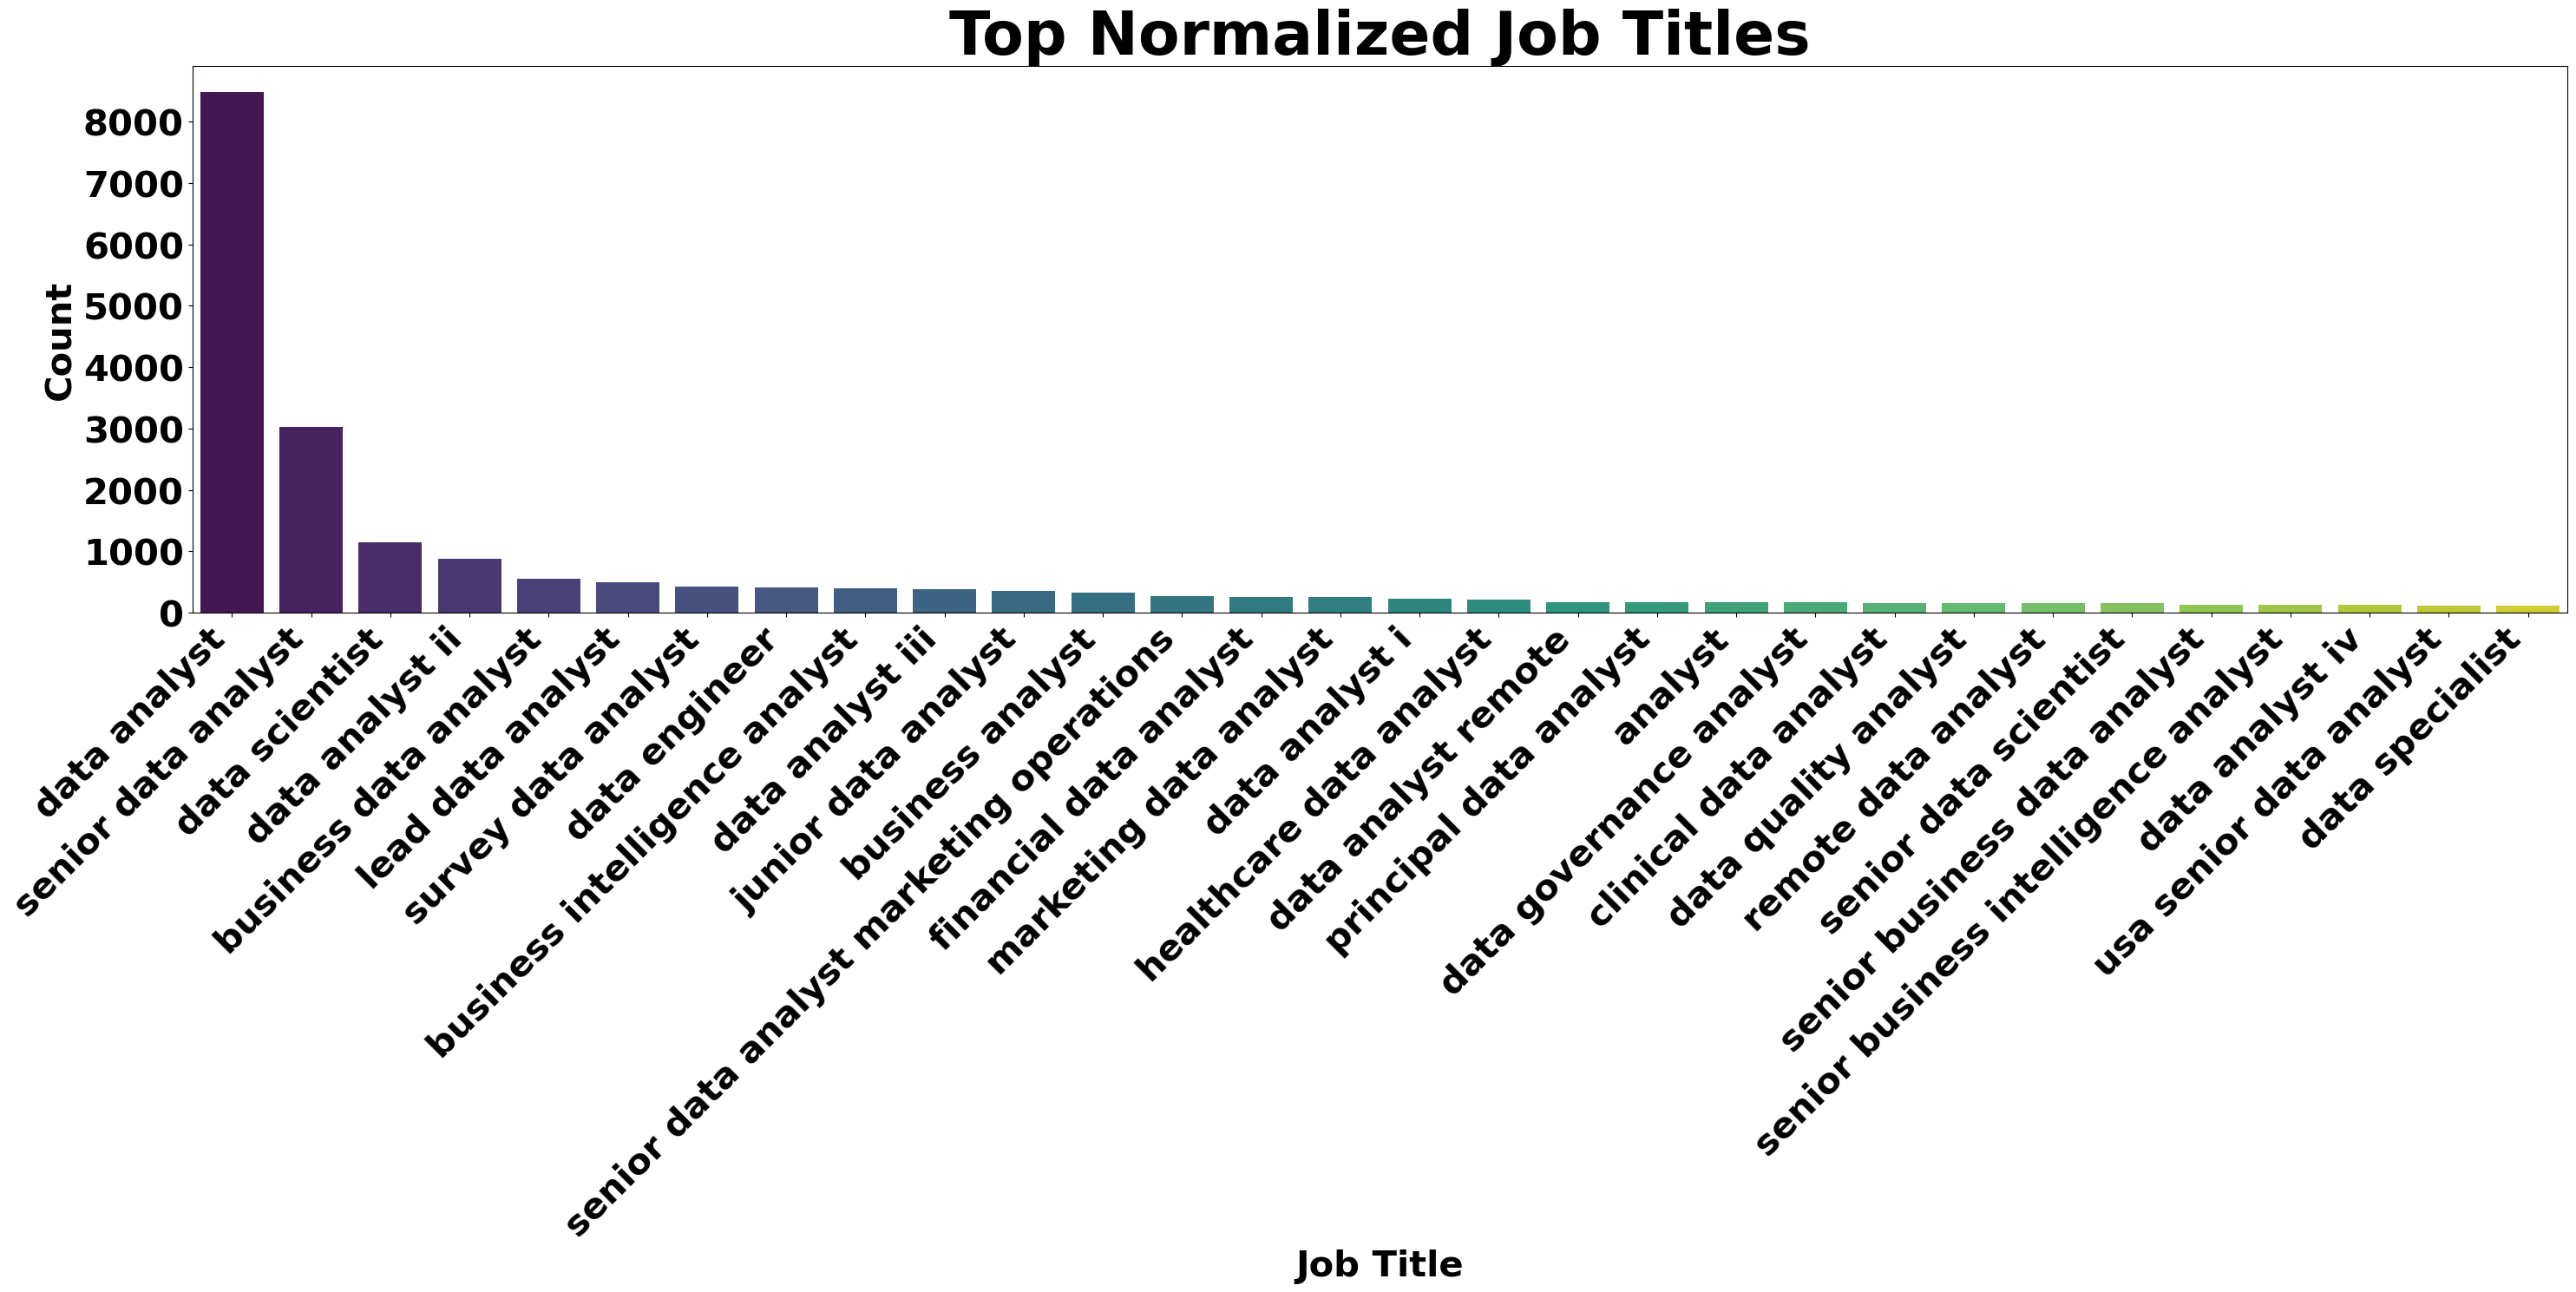

In [196]:
plt.figure(figsize=(30, 15))
sns.barplot(x=title_counts.index, y=title_counts.values, hue=title_counts.index, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top Normalized Job Titles', weight='bold', fontsize=50)
plt.xlabel('Job Title', weight='bold', fontsize=30)
plt.xticks(weight='bold', fontsize=30)
plt.ylabel('Count', weight='bold', fontsize=30)
plt.yticks(weight='bold', fontsize=30)
plt.tight_layout()
plt.show()
